## Poisson 2D

In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
pi = np.pi
n = 2
precision_train = 10
precision_test = 30
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)

    f = 2*pi**2 * tf.sin(pi*x)*tf.sin(pi*y)
    return -dy_xx - dy_yy - f


def func(x):
    return np.sin(pi * x[:, 0:1]) * np.sin(pi * x[:, 1:2])


def transform(x, y):
    res = x[:, 0:1] * (1 - x[:, 0:1]) * x[:, 1:2] * (1 - x[:, 1:2])
    return res * y


def boundary(_, on_boundary):
    return on_boundary

'''def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)

    f = k0 ** 2 * tf.sin(k0 * x[:, 0:1]) * tf.sin(k0 * x[:, 1:2])
    return -dy_xx - dy_yy - k0 ** 2 * y - f


def func(x):
    return np.sin(k0 * x[:, 0:1]) * np.sin(k0 * x[:, 1:2])


def transform(x, y):
    res = x[:, 0:1] * (1 - x[:, 0:1]) * x[:, 1:2] * (1 - x[:, 1:2])
    return res * y


def boundary(_, on_boundary):
    return on_boundary'''

geom = dde.geometry.Rectangle([0, 0], [1, 1])
k0 = 2 * np.pi * n
wave_len = 1 / n

hx_train = wave_len / precision_train
nx_train = int(1 / hx_train)

hx_test = wave_len / precision_test
nx_test = int(1 / hx_test)


geom = dde.geometry.Rectangle([0, 0], [1, 1])
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, nx_train**2, nx_train*4, solution=func, num_test=nx_test**2)

TypeError: boundary() takes 2 positional arguments but 3 were given

Compiling model...
'compile' took 0.000772 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [3.33e+04, 8.42e-01]    [3.00e+04, 8.42e-01]    [1.59e+00]    
1000      [4.12e+00, 5.32e-03]    [3.12e+00, 5.32e-03]    [1.00e+00]    
2000      [1.73e+00, 5.19e-03]    [1.41e+00, 5.19e-03]    [1.00e+00]    
3000      [1.00e+00, 4.32e-03]    [8.33e-01, 4.32e-03]    [1.00e+00]    
4000      [5.26e-01, 3.38e-03]    [4.32e-01, 3.38e-03]    [1.00e+00]    
5000      [2.61e-01, 2.86e-03]    [2.06e-01, 2.86e-03]    [1.00e+00]    
6000      [1.34e-01, 1.94e-03]    [1.01e-01, 1.94e-03]    [1.00e+00]    
7000      [7.91e-02, 9.98e-04]    [6.12e-02, 9.98e-04]    [1.00e+00]    
8000      [5.21e-02, 4.76e-04]    [4.13e-02, 4.76e-04]    [1.00e+00]    
9000      [4.02e-02, 2.27e-04]    [3.39e-02, 2.27e-04]    [1.00e+00]    
10000     [1.33e-01, 1.02e-04]    [1.10e-01, 1.02e-04]    [1.00e+00]    
11000     [2.84e-02, 5.96e-05]    [2.70e-02, 5.96e-05]    [1.00e+00]    
12000     [1.29e-02, 2.81e-05]    [1.13e-02, 2.81e-

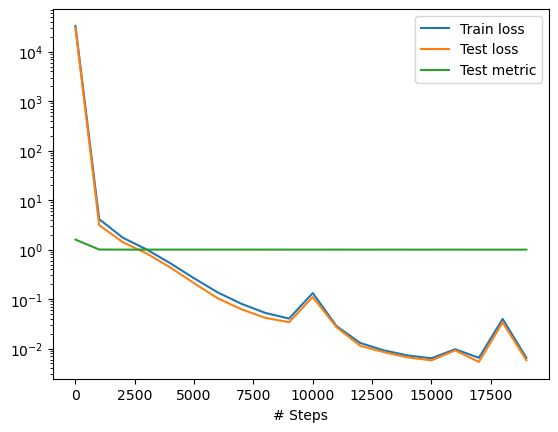

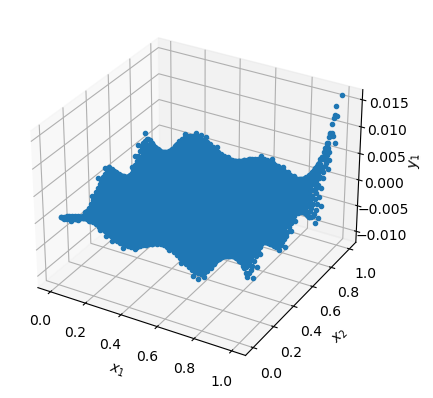

In [ ]:
M =400
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=15)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=19000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

(10080, 2)
(10080, 1)
(100, 100)


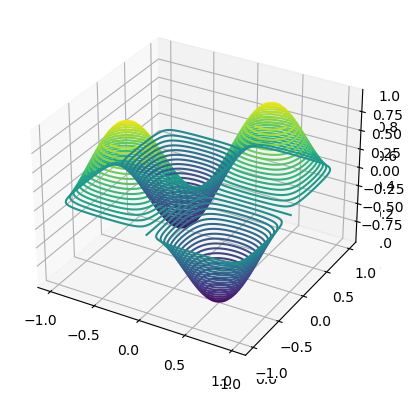

In [ ]:
xx = train_state.X_test
yy = train_state.y_test

print(np.shape(xx))
print(np.shape(yy))

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')
def func2(x,y):
    return np.sin(pi * x) * np.sin(pi * y)
y_es = func2(X,Y)
print(y_es.shape)
ax.contour3D(X,Y, y_es, 40)

Compiling model...
'compile' took 0.001348 s



Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss    Test loss     Test metric   
0         [7.44e-01]    [5.45e-01]    [1.01e+00]    
1000      [4.40e-04]    [3.07e-04]    [1.00e+00]    
2000      [3.69e-06]    [2.27e-06]    [1.00e+00]    
3000      [1.62e-06]    [9.65e-07]    [1.00e+00]    
4000      [1.40e-02]    [9.92e-03]    [1.00e+00]    
5000      [2.84e-06]    [1.68e-06]    [1.00e+00]    

Best model at step 3000:
  train loss: 1.62e-06
  test loss: 9.65e-07
  test metric: [1.00e+00]

'train' took 81.220727 s

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


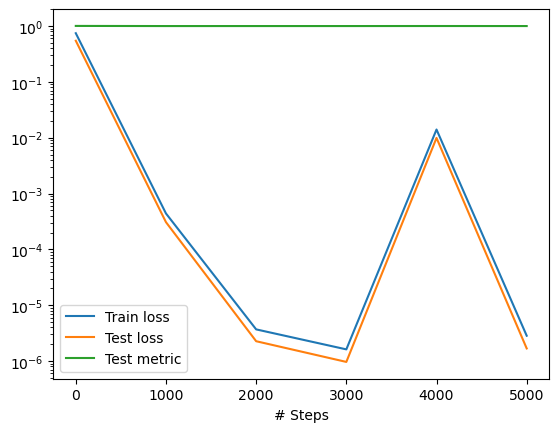

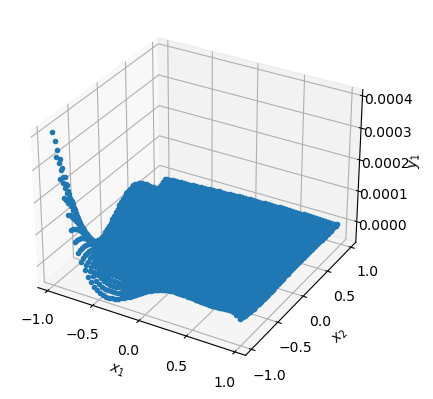

In [ ]:
# General parameters
n = 2
precision_train = 10
precision_test = 30
hard_constraint = True
weights = 100  # if hard_constraint == False
iterations = 5000
parameters = [1e-3, 3, 150, "sin"]

learning_rate, num_dense_layers, num_dense_nodes, activation = parameters

pi = np.pi

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)

    f = 2*pi**2 * tf.sin(pi*x)*tf.sin(pi*y)
    return -dy_xx - dy_yy - f


def func(x):
    return np.sin(pi * x[:, 0:1]) * np.sin(pi * x[:, 1:2])


def transform(x, y):
    res = x[:, 0:1] * (1 - x[:, 0:1]) * x[:, 1:2] * (1 - x[:, 1:2])
    return res * y


def boundary(_, on_boundary):
    return on_boundary



geom = dde.geometry.Rectangle([-1, -1], [1, 1])
k0 = 2 * np.pi * n
wave_len = 1 / n

hx_train = wave_len / precision_train
nx_train = int(1 / hx_train)

hx_test = wave_len / precision_test
nx_test = int(1 / hx_test)

if hard_constraint == True:
    bc = []
else:
    bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)


data = dde.data.PDE(
    geom,
    pde,
    bc,
    num_domain=nx_train ** 2,
    num_boundary=4 * nx_train,
    solution=func,
    num_test=nx_test ** 2,
)

net = dde.nn.FNN(
    [2] + [num_dense_nodes] * num_dense_layers + [1], activation, "Glorot uniform"
)

if hard_constraint == True:
    net.apply_output_transform(transform)

model = dde.Model(data, net)

if hard_constraint == True:
    model.compile("adam", lr=learning_rate, metrics=["l2 relative error"])
else:
    loss_weights = [1, weights]
    model.compile(
        "adam",
        lr=learning_rate,
        metrics=["l2 relative error"],
        loss_weights=loss_weights,
    )


losshistory, train_state = model.train(iterations=iterations)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)


Compiling model...
'compile' took 0.000449 s



Training model...

Step      Train loss    Test loss     Test metric   
0         [7.43e-02]    [6.88e-02]    [9.99e-01]    
1000      [5.23e-03]    [2.01e-03]    [9.72e-01]    
2000      [2.39e-03]    [4.29e-04]    [9.72e-01]    
3000      [1.71e-03]    [2.10e-04]    [9.72e-01]    
4000      [1.50e-03]    [1.53e-04]    [9.72e-01]    
5000      [1.24e-03]    [7.25e-05]    [9.72e-01]    

Best model at step 5000:
  train loss: 1.24e-03
  test loss: 7.25e-05
  test metric: [9.72e-01]

'train' took 83.904475 s

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


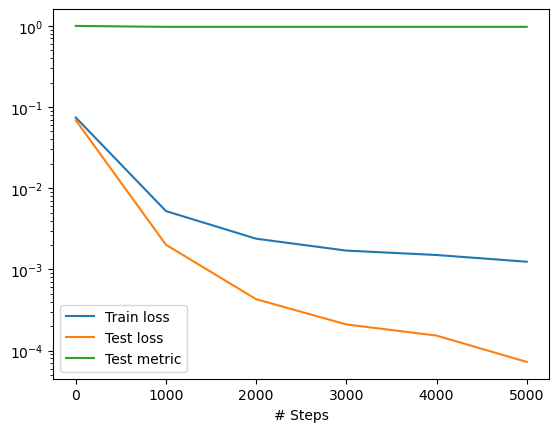

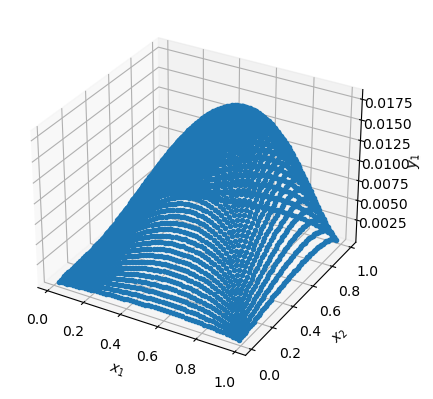

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np

# General parameters
n = 2
precision_train = 10
precision_test = 30
hard_constraint = True
weights = 100  # if hard_constraint == False
iterations = 5000
parameters = [1e-3, 3, 150, "sin"]

# Define sine function
if dde.backend.backend_name == "pytorch":
    sin = dde.backend.pytorch.sin
elif dde.backend.backend_name == "paddle":
    sin = dde.backend.paddle.sin
else:
    from deepxde.backend import tf

    sin = tf.sin

learning_rate, num_dense_layers, num_dense_nodes, activation = parameters


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)

    f = k0 ** 2 * sin(k0 * x[:, 0:1]) * sin(k0 * x[:, 1:2])
    return -dy_xx - dy_yy - k0 ** 2 * y - f


def func(x):
    return np.sin(k0 * x[:, 0:1]) * np.sin(k0 * x[:, 1:2])


def transform(x, y):
    res = x[:, 0:1] * (1 - x[:, 0:1]) * x[:, 1:2] * (1 - x[:, 1:2])
    return res * y


def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Rectangle([0, 0], [1, 1])
k0 = 2 * np.pi * n
wave_len = 1 / n

hx_train = wave_len / precision_train
nx_train = int(1 / hx_train)

hx_test = wave_len / precision_test
nx_test = int(1 / hx_test)

if hard_constraint == True:
    bc = []
else:
    bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)


data = dde.data.PDE(
    geom,
    pde,
    bc,
    num_domain=nx_train ** 2,
    num_boundary=4 * nx_train,
    solution=func,
    num_test=nx_test ** 2,
)

net = dde.nn.FNN(
    [2] + [num_dense_nodes] * num_dense_layers + [1], activation, "Glorot uniform"
)

if hard_constraint == True:
    net.apply_output_transform(transform)

model = dde.Model(data, net)

if hard_constraint == True:
    model.compile("adam", lr=learning_rate, metrics=["l2 relative error"])
else:
    loss_weights = [1, weights]
    model.compile(
        "adam",
        lr=learning_rate,
        metrics=["l2 relative error"],
        loss_weights=loss_weights,
    )


losshistory, train_state = model.train(iterations=iterations)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)